## 1. Athletics needs a new breed of scouts and managers
<p>Athletics goes back to the original Olympics. Since then, little has changed. Athletes compete as individuals, seeking to throw the farthest, jump the farthest (or highest) and run the fastest. But people like cheering for teams, waving banners and yelling like mad during matches, wearing their favorite player's jerseys and staying loyal to their side through thick and thin.  </p>
<p><img src="https://assets.datacamp.com/production/project_177/img/NAL_Shield_Blue.png" alt></p>
<p>What if athletics was a team sport? It could potentially be more interesting and would give us a new set of sports analytics to discuss. We might even reduce the incentives to do unsavory things in the pursuit of <em>altius</em>, <em>fortius</em> and <em>citius</em>.</p>
<p>This dataset contains results from American athletes in the horizontal jumps (triple jump and long jump) and throws (shot put, discus, javelin, hammer and weight). Let's read that in and examine women's javelin.</p>

In [167]:
# Load the tidyverse package
# .... YOUR CODE FOR TASK 1 ....
library(tidyverse)

# + Import magrittr library
library(magrittr)

# Import the full dataset
read_csv("datasets/athletics.csv") -> data

# Select the results of interest: women's javelin
data %>% 
  filter(Event == "Javelin" & Male_Female == "Female") %>%
  select(-c(Event, Male_Female)) -> javelin

 
# Give yourself a snapshot of your data 
# .... YOUR CODE FOR TASK 1 ....
head(javelin); summary(javelin)

Rows: 2098 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Event, Male_Female, Athlete
dbl (7): EventID, Flight1, Flight2, Flight3, Flight4, Flight5, Flight6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


EventID,Athlete,Flight1,Flight2,Flight3,Flight4,Flight5,Flight6
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,Brittany Borman,54.02,51.21,57.31,52.57,56.97,60.91
8,Ariana Ince,48.97,54.85,53.58,55.13,55.27,56.66
8,Kara Patterson,50.14,52.10,0.00,50.82,55.88,54.62
8,Kimberley Hamilton,47.96,0.00,50.93,54.13,55.15,53.34
8,Laura Loht,44.40,53.78,50.56,54.15,0.00,49.02
8,Brianna Bain,49.31,0.00,51.32,0.00,48.64,53.05


    EventID         Athlete             Flight1         Flight2     
 Min.   :   8.0   Length:178         Min.   : 0.00   Min.   : 0.00  
 1st Qu.: 178.0   Class :character   1st Qu.:41.53   1st Qu.:40.23  
 Median : 511.0   Mode  :character   Median :48.85   Median :48.85  
 Mean   : 796.8                      Mean   :40.80   Mean   :39.87  
 3rd Qu.:1703.0                      3rd Qu.:53.20   3rd Qu.:53.07  
 Max.   :1859.0                      Max.   :64.94   Max.   :61.38  
    Flight3         Flight4         Flight5         Flight6     
 Min.   : 0.00   Min.   : 0.00   Min.   : 0.00   Min.   : 0.00  
 1st Qu.: 0.00   1st Qu.:40.57   1st Qu.: 0.00   1st Qu.: 0.00  
 Median :47.34   Median :49.30   Median :48.01   Median :46.80  
 Mean   :34.22   Mean   :39.37   Mean   :32.97   Mean   :34.82  
 3rd Qu.:52.08   3rd Qu.:52.10   3rd Qu.:51.44   3rd Qu.:52.44  
 Max.   :62.42   Max.   :61.56   Max.   :60.84   Max.   :64.45  

## 2. Managers love tidy data
<p>This view shows each athlete’s results at individual track meets. Athletes have six throws, but in these meets only one – their longest – actually matters. If all we wanted to do was talk regular track and field, we would have a very easy task: create a new column taking the max of each row, arrange the data frame by that column in descending order and we’d be done.</p>
<p>But our managers need to do and know much more than that! This is a sport of strategy, where every throw matters. Managers need a deeper analysis to choose their teams, craft their plan and make decisions on match-day.</p>
<p>We first need to make this standard “wide” view tidy data. We’re not completely done with the wide view, but the tidy data will allow us to compute our summary statistics. </p>

In [168]:
# Assign the tidy data to javelin_long
javelin %>%
  gather(
    key = "Flight", 
    value = "Distance", 
    -c(Athlete, EventID)
  ) -> javelin_long

# Make Flight a numeric
# .... YOUR CODE FOR TASK 2 .... 
javelin_long %<>%
  mutate(
    Flight = 
      str_replace(
        string = Flight, 
        pattern = "Flight", 
        replacement = ""
      ) %>% 
     as.numeric()
  )

# Examine the first 6 rows
# .... YOUR CODE FOR TASK 2 ....
head(javelin_long)

EventID,Athlete,Flight,Distance
<dbl>,<chr>,<dbl>,<dbl>
8,Brittany Borman,1,54.02
8,Ariana Ince,1,48.97
8,Kara Patterson,1,50.14
8,Kimberley Hamilton,1,47.96
8,Laura Loht,1,44.40
8,Brianna Bain,1,49.31


## 3. Every throw matters
<p>A throw is a foul if the athlete commits a technical violation during the throw. In javelin, the most common foul is stepping over the release line. Traditionally, the throw is scored as an “F” and it has no further significance. Athletes can also choose to pass on a throw – scored as a “P” – if they are content with their earlier throws and want to “save themselves” for later.</p>
<p>Remember when we said every throw matters? Here, the goal is not for each player to have one great throw. All their throws in each event are summed together, and the team with the highest total distance wins the point. Fouls are scored as 0 and passing, well, your manager and teammates would not be pleased.</p>
<p>Here, we examine which athletes cover the most distance in each of their meets, along with two ways to talk about their consistency.</p>

In [169]:
javelin_long %>%
  # .... YOUR CODE FOR TASK 3 .... 
  filter(Distance > 0) %>%
  # .... YOUR CODE FOR TASK 3 .... 
  group_by(Athlete, EventID) %>%
  # .... YOUR CODE FOR TASK 3 .... 
  summarise(
    TotalDistance = sum(Distance),
    StandardDev = round(sd(Distance), 3), 
    Success = n(), .groups = "drop_last"
  ) -> javelin_totals

# View 10 rows of javelin_totals
# .... YOUR CODE FOR TASK 3 .... 
javelin_totals %>% ungroup() %>% slice(40:50)

Athlete,EventID,TotalDistance,StandardDev,Success
<chr>,<dbl>,<dbl>,<dbl>,<int>
Brittany Borman,218,218.66,2.323,4
Brittany Borman,238,222.90,1.171,4
Brittany Borman,511,229.38,2.128,4
Brittany Borman,747,244.89,0.391,4
Brittany Borman,938,288.08,2.397,5
Brittany Borman,1703,167.05,1.273,3
Channing Wilson,1740,247.43,2.646,5
Channing Wilson,1766,180.39,2.440,4
Channing Wilson,1773,285.59,2.425,6


## 4. Find the clutch performers
<p>In many traditional track meets, after the first three throws the leaders in the field are whittled down to the top eight (sometimes more, sometimes less) athletes. Like the meet overall, this is solely based on their best throw of those first three.&nbsp;</p>
<p>We give the choice to the managers. Of the three athletes who start each event, the manager chooses the two who will continue on for the last three throws. The manager will need to know which players tend to come alive – or at least maintain their form – in the late stages of a match. They also need to know if a player’s first three throws are consistent with their playing history. Otherwise, they could make a poor decision about who stays in based only on the sample unfolding in front of them.</p>
<p>For now, let’s examine just our top-line stat – total distance covered – for differences between early and late stages of the match.</p>

In [170]:
javelin %<>%
  # .... YOUR CODE FOR TASK 4 ....
  mutate(early = Flight1 + Flight2 + Flight3,
         late = Flight4 + Flight5 + Flight6,
         diff = late - early)

# Examine the last ten rows
# .... YOUR CODE FOR TASK 4 ....
javelin %>% tail(10)

EventID,Athlete,Flight1,Flight2,Flight3,Flight4,Flight5,Flight6,early,late,diff
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1773,Melissa Fraser,47.62,48.68,47.52,0.00,0.00,45.61,143.82,45.61,-98.21
1773,Kaelyn Carlson-Shipley,43.39,44.90,40.00,43.17,40.29,40.58,128.29,124.04,-4.25
1859,Kara Winger,56.89,52.93,55.48,54.45,57.59,62.88,165.30,174.92,9.62
1859,Avione Allgood,56.54,0.00,54.39,51.61,54.32,0.00,110.93,105.93,-5.00
1859,Ariana Ince,51.93,53.46,52.45,55.97,55.18,0.00,157.84,111.15,-46.69
1859,Bethany Drake,49.88,51.02,54.20,0.00,50.59,0.00,155.10,50.59,-104.51
1859,Alyssa Olin,0.00,53.74,52.08,51.48,0.00,52.78,105.82,104.26,-1.56
1859,Dominique Ouellette,49.60,44.22,50.60,51.26,49.25,53.17,144.42,153.68,9.26
1859,Kristen Clark,47.18,50.93,0.00,48.17,49.27,49.61,98.11,147.05,48.94


## 5. Pull the pieces together for a new look at the athletes
<p>The aggregate stats are in two data frame. By joining the two together, we can take our first rough look at how the athletes compare.</p>

In [171]:
javelin_totals %<>%
  # .... YOUR CODE FOR TASK 5 ....
  left_join(javelin, by = c("EventID", "Athlete")) %>%
  # .... YOUR CODE FOR TASK 5 ....
  select(Athlete, TotalDistance, StandardDev, Success, diff)

# Examine the first ten rows
# .... YOUR CODE FOR TASK 5 ....
javelin_totals %>% head(10)

New names:
• `` -> `...1`


Athlete,TotalDistance,StandardDev,Success,diff
<chr>,<dbl>,<dbl>,<int>,<dbl>
Abigail Gomez,151.76,1.232,3,-52.88
Abigail Gomez,244.12,1.633,5,-48.00
Abigail Gomez,206.71,2.969,4,-110.39
Abigail Gomez,221.83,1.295,4,-3.11
Abigail Gomez,154.80,1.028,3,53.40
Abigail Gomez Hernandez,135.08,0.718,3,45.56
Alicia DeShasier,270.12,2.155,5,59.98
Alicia DeShasier,319.86,2.257,6,0.74
Alicia DeShasier,274.69,1.534,5,53.47


## 6. Normalize the data to compare across stats
<p>The four summary statistics - total distance, standard deviation, number of successful throws and our measure of early vs. late - are on different scales and measure very different things. Managers need to be able to compare these to each other and then weigh them based on what is most important to their vision and strategy for the team. A simple normalization will allow for these comparisons.</p>

In [172]:
norm <- function(result) {
  (result - min(result)) / (max(result) - min(result))
}
aggstats <- c("TotalDistance", "StandardDev", "Success", "diff")

javelin_totals %>%
  ungroup() %>%
  # .... YOUR CODE FOR TASK 6 ....
  mutate(
    across(.cols = all_of(aggstats), .fns = norm)
  ) %>%
  # .... YOUR CODE FOR TASK 6 ....
  group_by(Athlete) %>%
  # .... YOUR CODE FOR TASK 6 ....
  summarise(
    across(.cols = everything(), .fns = mean)
  ) -> javelin_norm

head(javelin_norm)

Athlete,TotalDistance,StandardDev,Success,diff
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Abigail Gomez,0.4459534,0.2678973,0.4500000,0.3828542
Abigail Gomez Hernandez,0.2439924,0.1146165,0.2500000,0.7195185
Alicia DeShasier,0.7529941,0.3267327,0.8333333,0.6870598
Allison Updike,0.2831123,0.6392012,0.2500000,0.3203585
Alyssa Olin,0.4688902,0.2497063,0.5000000,0.3089929
Ariana Ince,0.6602443,0.3419779,0.6923077,0.4460812


## 7. What matters most when building your squad?
<p>Managers have to decide what kind of players they want on their team - who matches their vision, who has the skills they need to play their style of athletics and - ultimately - who will deliver the wins. A risk-averse manager will want players who rarely foul. The steely-eyed manager will want the players who can deliver the win with their final throws. </p>
<p>Like any other sport (or profession), rarely will any one player be equally strong in all areas. Managers have to make trade-offs in selecting their teams. Our first batch of managers have the added disadvantage of selecting players based on data from a related but distinct sport. Our data comes from traditional track and field meets, where the motivations and goals are much different than our own. </p>
<p>This is why managers make the big money and get sacked when results go south.</p>

In [173]:
weights <- c(1, 2, 3, 4)
javelin_norm %>%
  # .... YOUR CODE FOR TASK 7
  rowwise() %>%
  # .... YOUR CODE FOR TASK 7
  mutate(
    TotalScore = 
      as.numeric(weights %*% c(TotalDistance, StandardDev, Success, diff))
  ) %>%
  # .... YOUR CODE FOR TASK 7
  arrange(desc(TotalScore)) %>%
  as_tibble() %>%
  # .... YOUR CODE FOR TASK 7
  slice(1:5) %>% 
  select(Athlete, TotalScore) -> javelin_team

weights <- c(1, 2, 3, 4)
javelin_norm %>%
  # .... YOUR CODE FOR TASK 7
  mutate(
    TotalScore = 
      pmap_dbl(
        .l = list(x1 = TotalDistance, x2 = StandardDev, x3 = Success, x4 = diff), 
        .f = function(x1, x2, x3, x4) weights %*% c(x1, x2, x3, x4))
  ) %>%
  # .... YOUR CODE FOR TASK 7
  arrange(desc(TotalScore)) %>%
  # .... YOUR CODE FOR TASK 7
  slice(1:5) %>% 
  select(Athlete, TotalScore) -> javelin_team

javelin_team

Athlete,TotalScore
<chr>,<dbl>
Madalaine Stulce,7.175254
Asia Easley,7.084344
Dominique Ouellette,6.891572
Maggie Malone,6.826188
Diana Sammai Martinez,6.745972


## 8. Get to know your players
<p>The data has spoken! Now we have our five javelin throwers but we still don’t really know them. The <code>javelin_totals</code> data frame has the data that went into the decision process, so we will pull that up. This gives us an idea of what they each bring to the team. </p>
<p>We can also take a look at how they compare to the pool of athletes we started from by taking the mean and maximum of each statistic.</p>

In [174]:
javelin_totals %>% 
  # .... YOUR CODE FOR TASK 8 ....
  filter(Athlete %in% javelin_team$Athlete) %>%
  # .... YOUR CODE FOR TASK 8 ....
  summarize(across(.cols = everything(), .fns = mean)) -> team_stats

'cbind' %>%
  do.call(
    sapply(
      X = javelin_totals, 
      FUN = function(x) if(is.numeric(x)) c(max(x), mean(x))
    )
  ) %>% 
  data.frame() -> pool_stats
pool_stats$MaxAve <- c("Maximum", "Average")
pool_stats %<>% gather(key = "Statistic", value = "Aggregate", -MaxAve)
                                                 
# Examine team stats
# .... YOUR CODE FOR TASK 8 ....
team_stats

Athlete,TotalDistance,StandardDev,Success,diff
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Asia Easley,187.580,4.7795,4.5,64.060
Diana Sammai Martinez,262.000,2.3750,6.0,11.880
Dominique Ouellette,298.655,2.9105,6.0,2.875
Madalaine Stulce,274.760,4.4720,6.0,-6.420
Maggie Malone,293.480,1.9960,5.0,61.120


## 9. Make your case to the front office
<p>The manager knows what she wants out of the team and has the data to support her choices, but she still needs to defend her decisions to the team owners. They do write the checks, after all. </p>
<p>The owners are busy people. Many of them work other jobs and own other companies. They trust their managers, so as long the manager can give them an easy-to-digest visual presentation of why they should sign these five athletes out of all the others, they will approve.</p>
<p>A series of plots showing how each athlete compares to the maximum and the average of each statistic will be enough for them.</p>

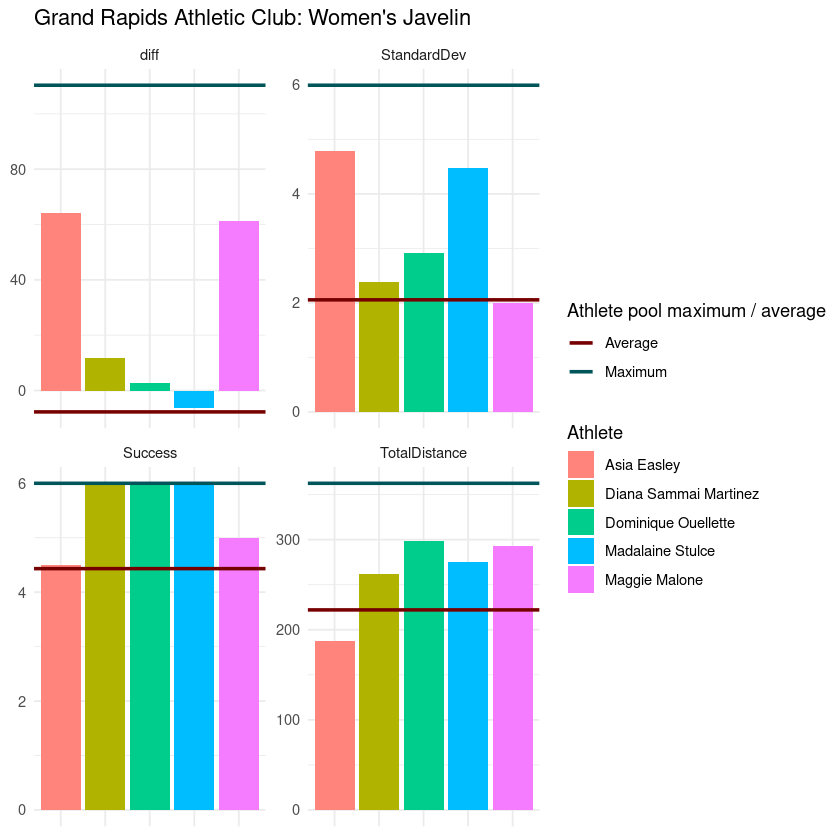

In [175]:
p <- team_stats %>%
  # .... YOUR CODE FOR TASK 9 ....
  gather(key = "Statistic", value = "Aggregate", -Athlete) %>%
  # .... YOUR CODE FOR TASK 9 ....
  ggplot(mapping = aes(x = Athlete, y = Aggregate, fill = Athlete)) +
  # .... YOUR CODE FOR TASK 9 ....
  geom_bar(stat = "identity") +
  # .... YOUR CODE FOR TASK 9 ....
  facet_wrap(vars(Statistic), scales = "free_y") +
  geom_hline(
    data = pool_stats, 
    aes(yintercept = Aggregate, group = Statistic, color = MaxAve), 
    size = 1
  ) +
  labs(title = "Grand Rapids Athletic Club: Women's Javelin", 
       color = "Athlete pool maximum / average") +
  scale_fill_hue(l = 70) + 
  scale_color_hue(l = 20) +
  theme_minimal() +
  theme(axis.text.x = element_blank(), 
        axis.title.x = element_blank(), 
        axis.title.y=element_blank())
  
p

## 10. Time to throw down
<p>Before the athletics season opens, the manager will perform similar analyses for the other throws, the jumps, and running events. Then you'll game out different permutations of your team and your opponent to come up with the best lineup and make the best decisions on match day. For now, since it's what we know best and we're almost out of time, let's simulate a simple javelin match. </p>
<p>The winner is the team that throws the highest combined distance: six throws from each of your three players against six throws from each of the opponent's three players.</p>

In [176]:
home <- c(1, 3, 4)
away <- sample(1:nrow(javelin_totals), 3, replace = FALSE)

HomeTeam <- round(sum(team_stats$TotalDistance[home]), 2)
AwayTeam <- round(sum(javelin_totals$TotalDistance[away]), 2)

print(paste0("Javelin match, Final Score: ", HomeTeam, " - ", AwayTeam))
ifelse(HomeTeam > AwayTeam, print("Win!"), print("Sometimes you just have to take the L."))

[1] "Javelin match, Final Score: 760.99 - 459.65"
[1] "Win!"


[1] "Win!"